# Classificação de Risco de Credito com Naive Bayes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB

/home/akatosh/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/akatosh/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/akatosh/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Conhecendo a base dados

Fonte do Dataset: <a href="https://www.kaggle.com/kabure/german-credit-data-with-risk/downloads/german-credit-data-with-risk.zip/1" margin-left='5'>german_credit_data_with_risk</a>

O **iris Dataset** é um clássico do estudo de Ciencia de Dados e Machine Learning. 
Nesse estudo de caso o objetivo é, através da base de dados, fazer a **classificação** da Flor iris (ou Flor de lis) que possue variações. O tipo da flor depende da largura e altura de suas pétalas e sépalas.


<img width="450px" height="450px" src="assets/imgs/iris-machinelearning.png"/>

<a href="https://www.datacamp.com/community/tutorials/machine-learning-in-r" margin-left='5'>Fonte da imagem</a>

In [2]:
#recebendo dataset
data = pd.read_csv('assets/dataset/credit.csv')
#exibindo as primeiras linhas do dataset
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


**Dados**

* sepal_length: comprimento da sépala, numérico (float)
* sepal_width:  largura da sépala, numérico (float)
* petal_length: comprimento da pétala, numérico (float)
* petal_width:  largura da pétala, numérico (float)
* variety:      Variedade, Categórico (
    * Setosa
    * Versicolor
    * Virginica
    
    )



In [3]:
#tamanho do dataset
nLinhas, nColunas = data.shape
print(f'Existem {nLinhas} linhas e {nColunas} colunas')

Existem 1000 linhas e 11 colunas


### Definindo funções de auxilio

In [4]:
#Definindo função para plotar matriz de confusão
def plot_cmatrix(x):
    cmatriz = x
    cmap=plt.cm.BuPu
    normalize = False
    classes =  ["setosa","versicolor","virginica"]
    plt.imshow(cmatriz, interpolation='nearest', cmap=cmap)
    plt.title('Matriz de confusao')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cmatriz.max() / 2.
    for i, j in itertools.product(range(cmatriz.shape[0]), range(cmatriz.shape[1])):
        plt.text(j, i, format(cmatriz[i, j], fmt))


    plt.tight_layout()
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()

#Definindo função para plotar grafico de comparacao
def  graf_importances(x,y):
    plt.suptitle('Grau de importancia dos atributos\n Gerado pelo modelo')
    plt.ylabel('Grau')
    plt.xlabel('Atributo')

    plt.bar(x[0],y[0])
    plt.bar(x[1],y[1])
    plt.bar(x[2],y[2])
    plt.bar(x[3],y[3])
    plt.show()

### Preparando os dados

In [66]:
#Dividindo dataset em dados de entrada(x) e saida(y) 
x,y = data,data['variety']
x = x.drop(['variety'],axis=1)

#Dividindo dados de entrada(x) e saida(y) em dados de treino(x_train,y_train) e teste(x_test,y_test) 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

### Treinando modelo

In [71]:
#criando
modelo = DecisionTreeClassifier(criterion='entropy')
modelo.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [73]:
#prevendo dados de teste
predicoes = modelo.predict(x_test)

#vendo a acurácia do modelo
acc = accuracy_score(predicoes,y_test)
print(f'O modelo tem {acc} de acurácia') 

O modelo tem 0.9473684210526315 de acurácia


### Explorando resultados

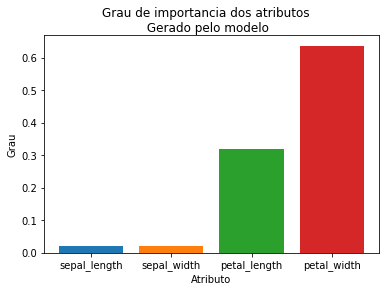

In [74]:
#Grau de importancia dos atributos encontrados pela Decison  Tree
atributos = ['sepal_length','sepal_width','petal_length','petal_width']
importancia = modelo.feature_importances_
relacao = [atributos,importancia]

graf_importances(atributos,importancia)

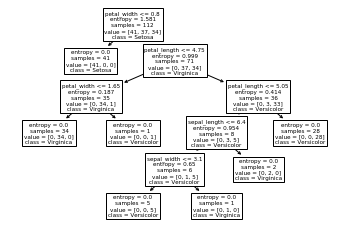

In [75]:
#arvore de decisao gerada
class_names = ['Setosa','Virginica','Versicolor']
tree = export.plot_tree(modelo,
                feature_names=atributos,
                class_names=class_names,
                max_depth=10,)

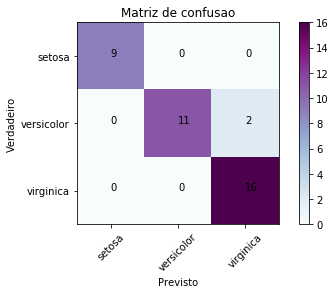

In [76]:
# Plotando matriz de confusão
matriz = confusion_matrix(y_test,predicoes)
plot_cmatrix(matriz)

### Teste o Algoritmo

In [77]:
altura_sep = float(input('Informe altura da Sepala: '))
largura_sep = float(input('Informe Largura da Sepala: '))
altura_pet = float(input('Informe altura da Petala: '))
largura_pet = float(input('Informe Largura da Petala: '))

entradas = [[altura_sep,largura_sep,altura_pet,largura_pet]]
tipo = modelo.predict(entradas)[0]

print('\nA flor e do tipo',tipo)

Informe altura da Sepala: 3
Informe Largura da Sepala: 2
Informe altura da Petala: 1
Informe Largura da Petala: 2

A flor e do tipo  Virginica
